        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
شکل داده‌های X: (30, 2)
شکل داده‌های y: (30,)
(9, 2)


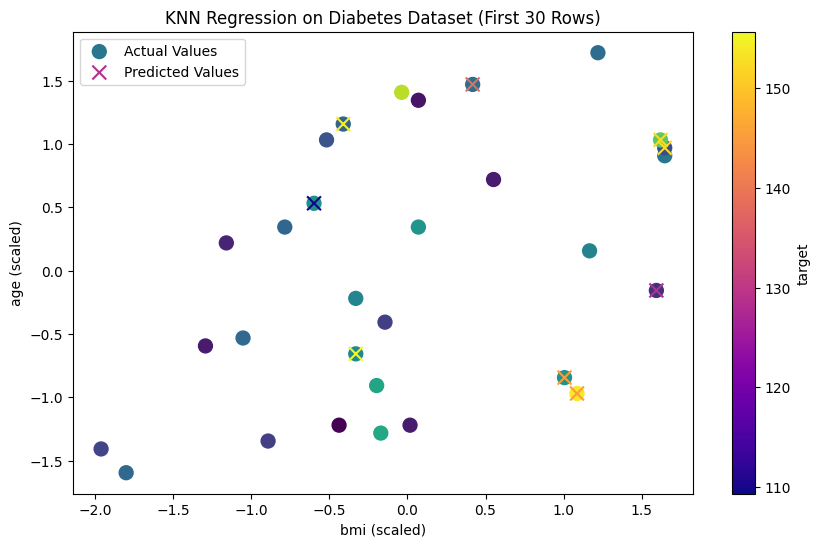

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# بارگذاری دیتاست دیابت
diabetes = load_diabetes()

# تبدیل به DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# نمایش ۵ ردیف اول


# افزودن ستون هدف (مقدار بیماری)
df["target"] = diabetes.target

print(df.head())

# انتخاب 30 سطر اول و دو ویژگی مهم (به عنوان مثال: 'BMI' و 'Age')
data = df.head(30)  # تبدیل به DataFrame و انتخاب 30 سطر اول
X = data[['bmi', 'age']]  # دو ویژگی مهم
y = data['target']  # هدف (Target)

# چاپ شکل داده‌ها (اختیاری)
print("شکل داده‌های X:", X.shape)
print("شکل داده‌های y:", y.shape)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(X_test.shape)

# آموزش مدل KNN رگرسیون
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# پیش‌بینی مقادیر
y_pred = knn_regressor.predict(X_test)

# رسم نمودار
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=100, label='Actual Values')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='plasma', marker='x', s=100, label='Predicted Values')
plt.xlabel('bmi (scaled)')
plt.ylabel('age (scaled)')
plt.title('KNN Regression on Diabetes Dataset (First 30 Rows)')
plt.colorbar(label='target')
plt.legend()
plt.show()